- 의사결정나무
  - 이진 분류를 수행하는 노드가 모여 만들어짐
  - 하위 노드로 진행할수록 순수도가 증가
      - 순수한 데이터의 비율이 높을수록 완벽한 트리가 됨
      - 데이터를 분리하는 기준은 지니 지수와 엔트로피 지수가 있음
          - 지니 지수 : 데이터 세트 내 불순도나 분산을 측정하는 지표로 0~1 사이의 값 (낮을수록 데이터의 순도가 높음)
              - 의사결정나무에서는 지니 불순도의 차이가 큰 분할을 선택
          - 엔트로피 지수 : 데이터 세트 내 불확실성이나 혼잡도를 측정한 값 (낮을수록 데이터의 불확실성이 낮음)
              - 의사결정나무에서는 정보이득이 가장 큰 분할을 선택함
  - 가지를 너무 많이 치게 되면 과대적합이 발생하게 됨 (파라미터를 주지 않을 경우)
      - 가지치기 : 평가용 데이터를 이용하여 불필요하거나 과적합이 발생하는 노드를 제거

- Graphviz
  - https://gitlab.com/api/v4/projects/4207231/packages/generic/graphviz-releases/10.0.1/windows_10_cmake_Release_graphviz-install-10.0.1-win64.exe

In [1]:
import os
os.chdir("Y:\Python\Mega_IT\F.Machine_Learning/1.Supervised_Learning/5.Decision_Tree")
os.getcwd()

'Y:\\Python\\Mega_IT\\F.Machine_Learning\\1.Supervised_Learning\\5.Decision_Tree'

In [2]:
import sys
sys.path.append("Y:\Python\Mega_IT")

import warnings
warnings.filterwarnings('ignore')

from yjk_module.preprocessing import *
from yjk_module.ml_module import *

from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.classification import *

In [4]:
# 알고리즘
from sklearn.tree import DecisionTreeClassifier

# 시각화
from sklearn.tree import plot_tree, export_text, export_graphviz
import dtreeviz, graphviz

In [5]:
origin1 = pd.read_excel("./data/pima_indians_diabetes.xlsx")

In [6]:
# 정제 대상 필드명
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# `0`값을 결측치로 대체후 평균으로 다시 치환
df1 = origin1.copy()
df1[zero_features] = df1[zero_features].replace(0, np.nan)
df1_2 = my_replace_missing_value(df1)

df1_2['Outcome'] = df1_2['Outcome'].astype('int')

x_train, x_test, y_train, y_test = my_train_test_split(df1_2, yname='Outcome', test_size=0.2, scalling=False)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [7]:
dt = DecisionTreeClassifier(random_state = 0, max_depth = 3)

In [8]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [9]:
et = export_text(dt, feature_names = x_train.columns, class_names = ['음성', '양성'])
print(et)

|--- Glucose <= 143.50
|   |--- BMI <= 26.95
|   |   |--- BMI <= 26.35
|   |   |   |--- class: 음성
|   |   |--- BMI >  26.35
|   |   |   |--- class: 음성
|   |--- BMI >  26.95
|   |   |--- Glucose <= 107.50
|   |   |   |--- class: 음성
|   |   |--- Glucose >  107.50
|   |   |   |--- class: 음성
|--- Glucose >  143.50
|   |--- Glucose <= 154.50
|   |   |--- Glucose <= 152.50
|   |   |   |--- class: 양성
|   |   |--- Glucose >  152.50
|   |   |   |--- class: 음성
|   |--- Glucose >  154.50
|   |   |--- Insulin <= 629.50
|   |   |   |--- class: 양성
|   |   |--- Insulin >  629.50
|   |   |   |--- class: 음성



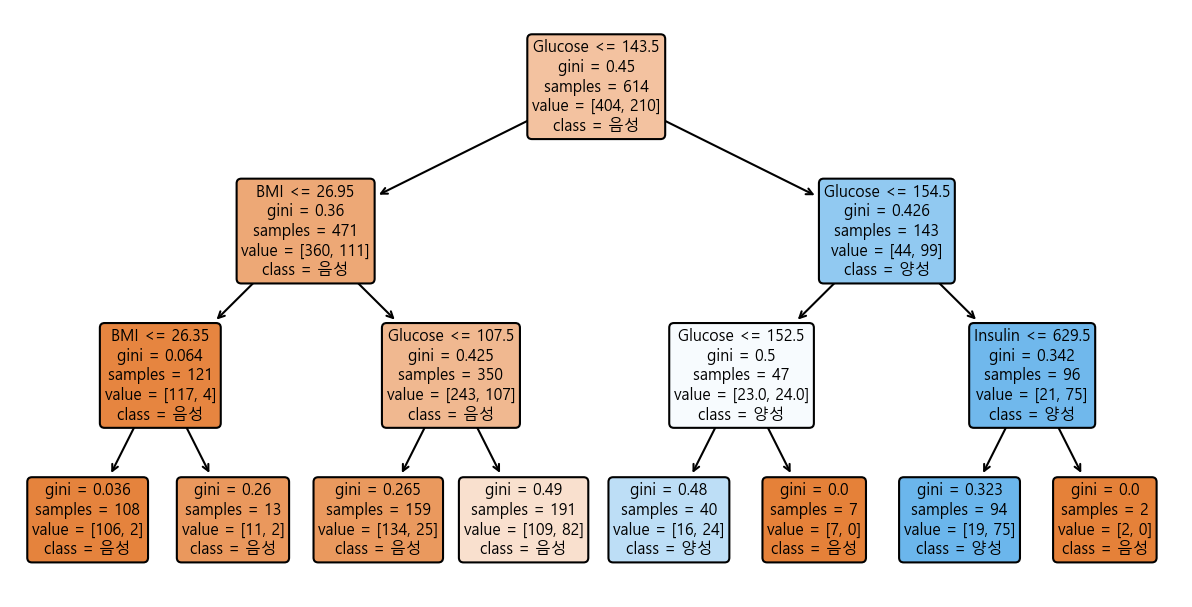

In [10]:
plt.figure(figsize = (10, 5), dpi = 150)

plot_tree(dt, max_depth = 3, class_names = ['음성', '양성'], feature_names = x_train.columns, filled = True, rounded = True)
plt.show()

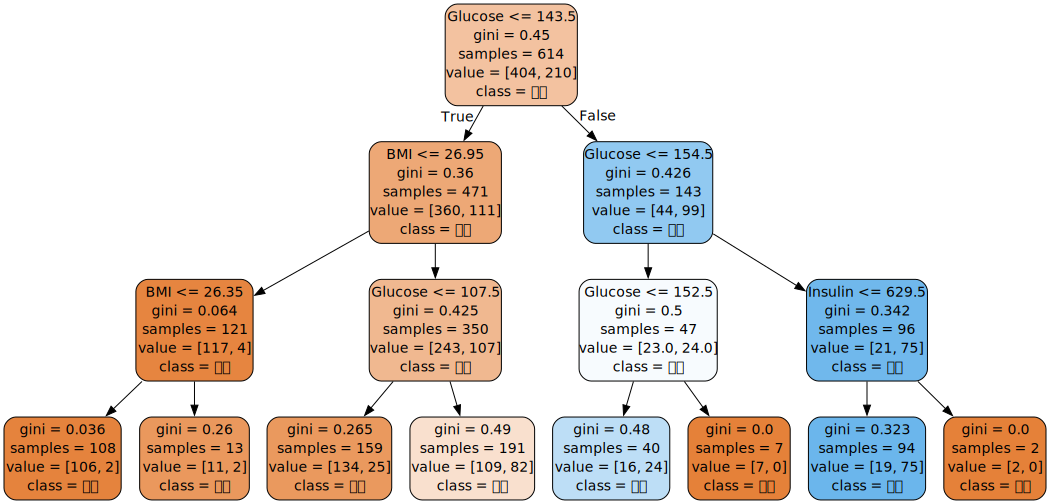

In [11]:
export_graphviz(
    dt,
    out_file='tree.dot',
    feature_names=list(x_train.columns),
    class_names=['음성', '양성'],
    rounded=True,   # 노드의 모서리를 둥글게
    filled=True,     # 노드의 색상을 다르게
    fontname='Malgun Gothic'
)

with open("tree.dot", encoding = 'utf-8') as f:
    dot = f.read()
    display(graphviz.Source(dot))

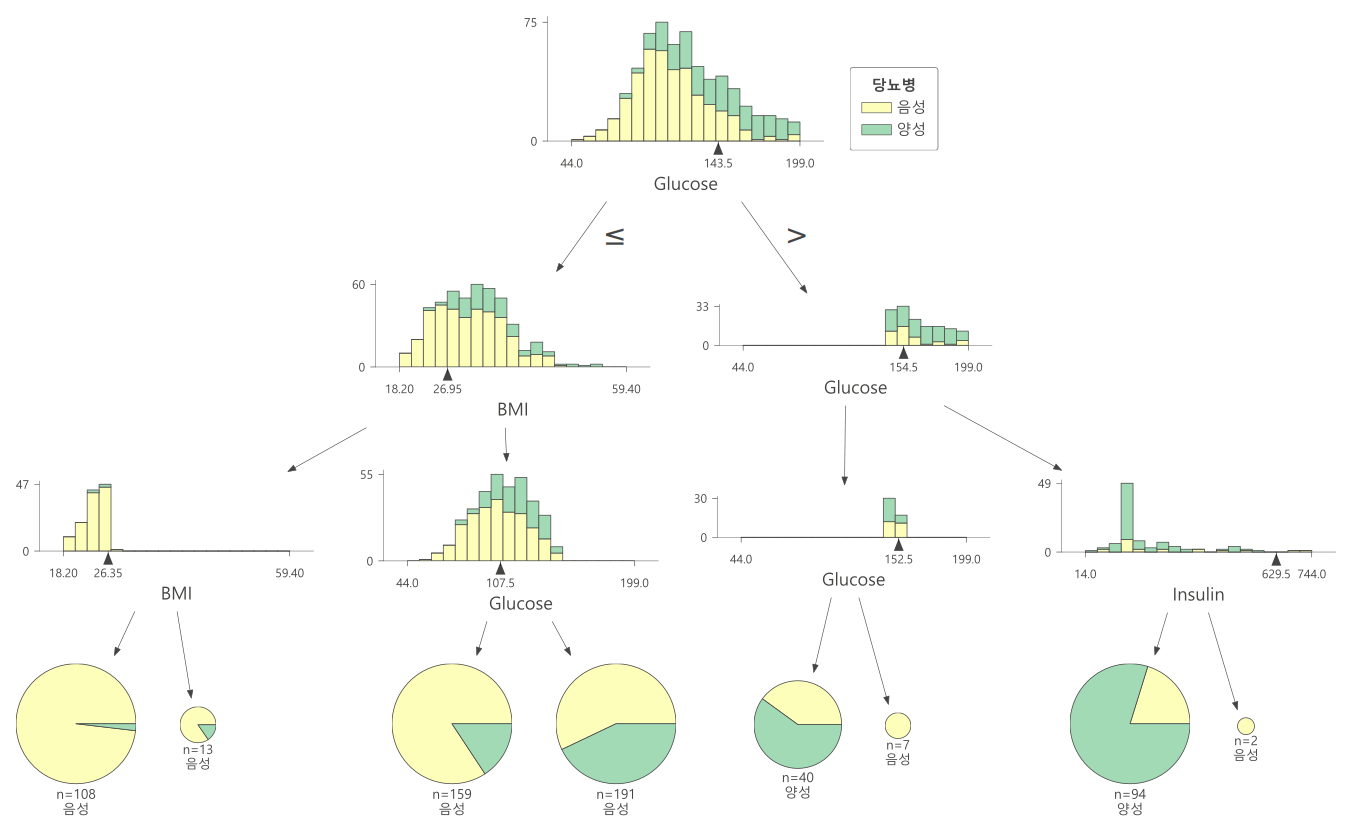

In [12]:
viz = dtreeviz.model(dt,
                     X_train = x_train, y_train = y_train, target_name = '당뇨병', feature_names = list(x_train.columns),
                     class_names = ['음성', '양성'])

viz.view(scale = 2.0, fontname = 'Malgun Gothic')

[분류분석 성능평가]
+-------------------+--------------+--------------+-----------------------------------------------------------+
|                   |   훈련데이터 |   검증데이터 | 설명                                                      |
|-------------------+--------------+--------------+-----------------------------------------------------------|
| 정확도(Accuracy)  |     0.762215 |     0.746753 | 예측 결과(TN,FP,TP,TN)가 실제 결과(TP,TN)와 일치하는 정도 |
| 정밀도(Precision) |     0.738806 |     0.806452 | 양성으로 예측한 결과(TP,FP) 중 실제 양성(TP)인 비율       |
| 재현율(Recall)    |     0.471429 |     0.431034 | 실제 양성(TP,FN) 중 양성(TP)으로 예측한 비율              |
| 위양성율(Fallout) |    0.0866337 |       0.0625 | 실제 음성(FP,TN) 중 양성(FP)으로 잘못 예측한 비율         |
| 특이성(TNR)       |     0.913366 |       0.9375 | 실제 음성(FP,TN) 중 음성(TN)으로 정확히 예측한 비율       |
| F1 Score          |     0.575581 |     0.561798 | 정밀도와 재현율의 조화평균                                |
| AUC               |     0.820539 |      0.79445 | ROC Curve의 면적으로, 1에 가까울수록 좋은 모델            |
+--

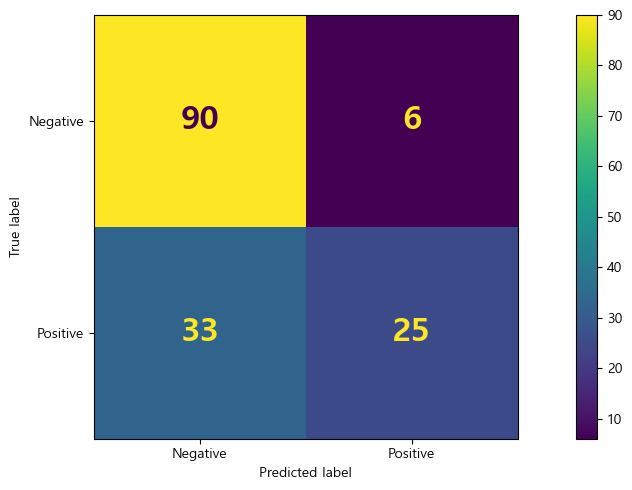

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



[Roc Curve]


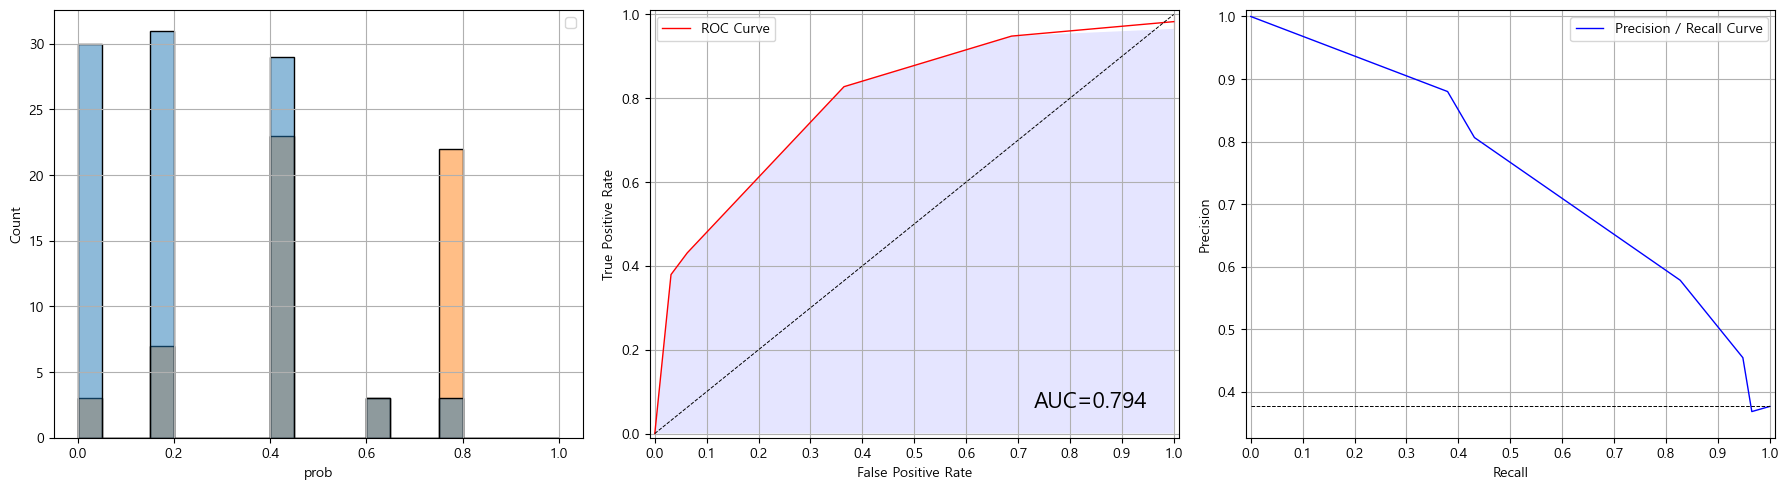


[학습곡선]


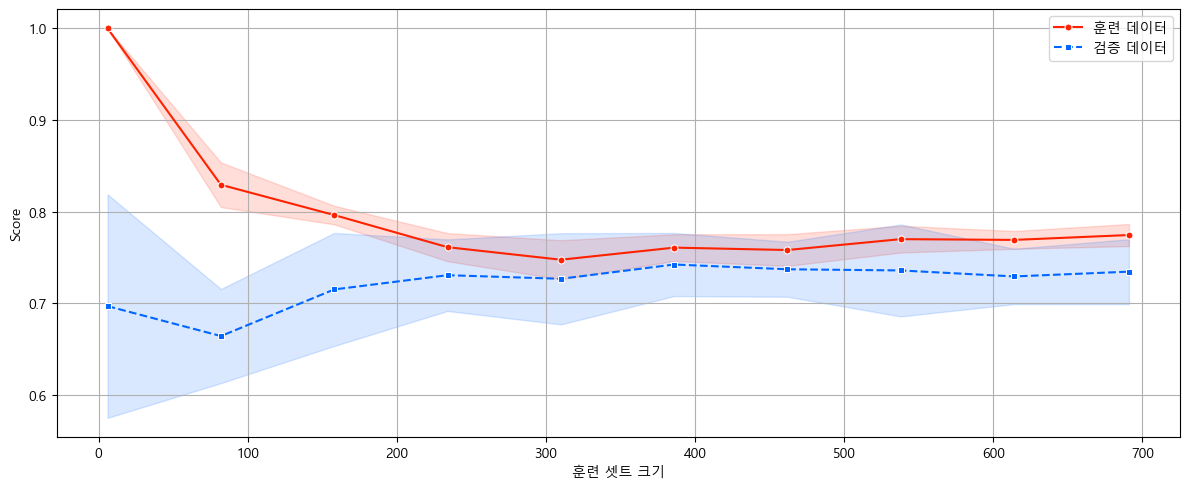

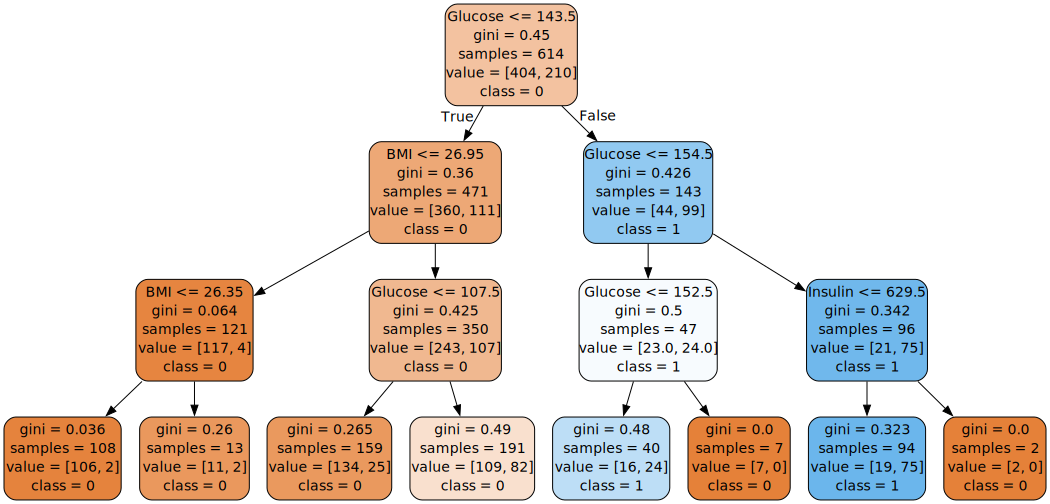

In [13]:
my_classification_result(dt, x_train, y_train, x_test, y_test)

In [14]:
support = YjkClassifierSupport()

사용 가능한 모델 : ['LogisticRegression', 'SGDClassifier', 'KNeighborsClassifier', 'LinearSVC', 'SVC', 'GaussianNB', 'DecisionTreeClassifier', 'CatboostClassifier']


In [15]:
result_df = yjk_classifier_multi_gridsearch(support, x_train, y_train, x_test, y_test, randomized_search = True, include_models = 'all')

LogisticRegression 모델 소요 시간 : 0:00:00
SGDClassifier 모델 소요 시간 : 0:00:00
KNeighborsClassifier 모델 소요 시간 : 0:00:00
LinearSVC 모델 소요 시간 : 0:00:00
SVC 모델 소요 시간 : 0:00:44
GaussianNB 모델 소요 시간 : 0:00:00
DecisionTreeClassifier 모델 소요 시간 : 0:00:00
CatboostClassifier 모델 소요 시간 : 0:00:06
총 소요 시간 : 0:00:52


In [16]:
result_df

,best_model,best_param,accuracy_train,accuracy_test
model_name,,,,
LinearSVC,"LinearSVC(C=10, dual=False, max_iter=10000, pe...","{'penalty': 'l1', 'max_iter': 10000, 'loss': '...",0.768747,0.785714
LogisticRegression,"LogisticRegression(C=10, max_iter=500, n_jobs=-1)","{'penalty': 'l2', 'max_iter': 500, 'C': 10}",0.770360,0.779221
SVC,"SVC(C=10, degree=2, kernel='poly')","{'kernel': 'poly', 'degree': 2, 'C': 10}",0.767054,0.772727
GaussianNB,GaussianNB(var_smoothing=1e-05),{'var_smoothing': 1e-05},0.758884,0.772727
CatboostClassifier,<catboost.core.CatBoostClassifier object at 0x...,{},0.767187,0.772727
KNeighborsClassifier,"KNeighborsClassifier(n_jobs=-1, n_neighbors=4,...","{'weights': 'distance', 'p': 1, 'n_neighbors': 4}",0.737864,0.766234
DecisionTreeClassifier,"DecisionTreeClassifier(max_depth=10, min_sampl...","{'splitter': 'random', 'min_samples_split': 10...",0.750714,0.759740
SGDClassifier,"SGDClassifier(alpha=1, loss='log_loss', max_it...","{'tol': 0.001, 'penalty': 'elasticnet', 'max_i...",0.682734,0.740260


In [17]:
support.call_model('SVC', return_model = False)

[SVC의 파라미터]
+--------------+--------------------------------------------------------------------+--------------------------------------+
| 파라미터명   | 파라미터 노트                                                      | 파라미터 범위                        |
|--------------+--------------------------------------------------------------------+--------------------------------------|
| C            | 오류항에 대한 패널티, 값이 클수록 오류에 대한 패넡티가 커짐        | [0.1, 1, 10]                         |
| kernel       | 변환의 종류를 지정, 데이터를 높은 차원으로 매핑하는 함수, 기본 rbf | ['linear', 'poly', 'rbf', 'sigmoid'] |
| degree       | kernel이 poly일 경우 다항식의 차수, 기본 3                         | [2, 3, 4, 5]                         |
+--------------+--------------------------------------------------------------------+--------------------------------------+


In [18]:
model = result_df.loc['SVC', 'best_model']

In [19]:
params = ['linear', 'poly', 'rbf', 'sigmoid']

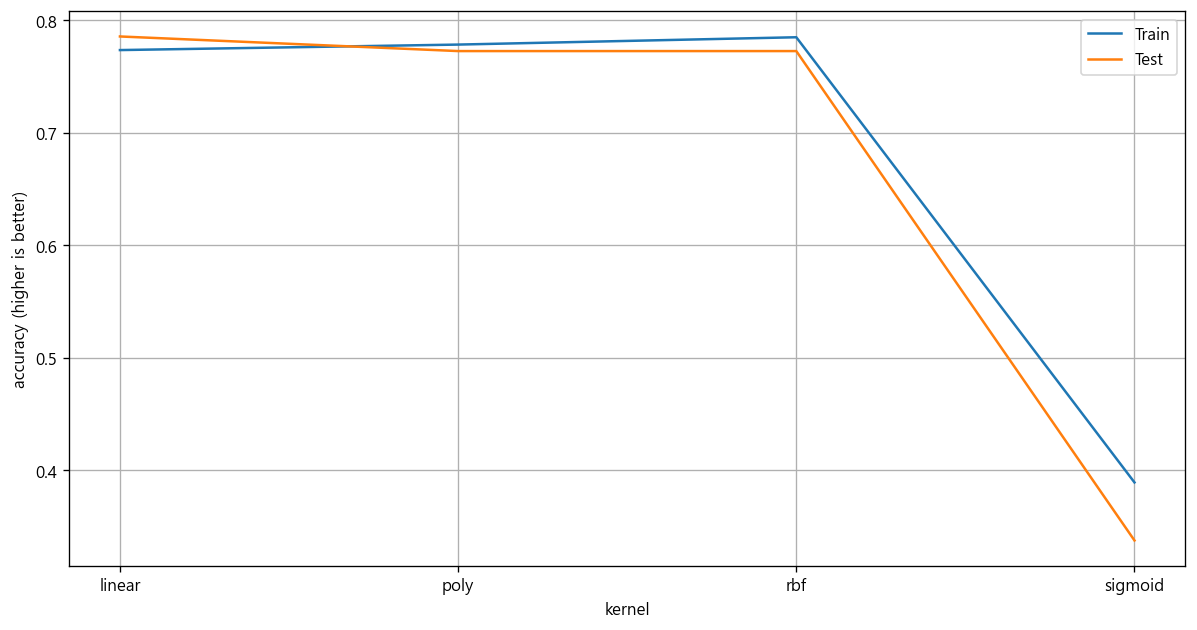

,훈련 데이터,검증 데이터,Min-Max
kernel,,,
linear,0.773616,0.785714,최대값
poly,0.778502,0.772727,
rbf,0.785016,0.772727,
sigmoid,0.389251,0.337662,최소값


In [20]:
yjk_classification_param_plot(model, x_train, y_train, 'kernel', params, x_test = x_test, y_test = y_test, scoring = 'accuracy', dpi = 120)